In [1]:
from IPython.display import display, Markdown, set_matplotlib_formats
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams.update({
    'font.family': 'serif',
    'text.usetex': True,
    'figure.dpi': 100,
    'savefig.dpi': 300,
    'axes.labelsize': 'large'
})

 # Vsiljeno električno nihanje

Za električni nihajnemi krogu, ki ga vzbujamo s napetostjo $U_0$ in frekvenco $\omega$, velja

$$\ddot{I} + 2\beta\dot{I} + \omega_0^2I = \frac{U_0}{L} \cos \omega t,$$

kjer je $\beta$ konstanta dušenja, $\omega_0$ pa lastna frekvenca nihajnega kroga

$$\beta = \frac{R}{2L}, \quad \omega_0^2 = \frac{1}{LC}.$$

Po nekaj časa prehodno obnašanje izzveni in krog niha s frekvenco, s katero ga vzbujamo. Ta partikularna rešitev je oblike

$$I = I_0 \cos(\omega t + \delta),$$

pri čemer je $\delta$ fazni zamik od vzbujanja, $I_0$ pa amplituda nihanja, ki se spreminja s frekvenco vzbujanja

$$\delta = \arctan{\left( \frac{2\beta \omega}{w_0^2 - \omega^2} \right)}, \quad I_0 = \frac{U_0 \omega}{L \left| \omega_0^2 - \omega^2 + i 2\beta w \right|}.$$

Vidimo, da je pri vzbujanju z lastno frekvenco amplituda največja — nihanji krog je v resonanci. Natačno kako veliko amplitudo nihanje doseže, je odvisno od faktorja dušenja, najbolj neposredno pa kar od upornosti nihajnega kroga.

## Namen

Opazovati vzbujeno nihanje v električnem nihajnem krogu in določiti resonančno krivuljo tega nihanja. Drugotno tudi opazovati Lissajoujeve figure in iz njih oceniti fazni zamik od vzbujanja.

## Pribor

Osciloskop, frekvenčni generator s frekvenco $600\,\mathrm{kHz}$, resonančni krog, različni upori.

## Meritve

Ko nastavljamo kondenzator, njegovo kapacitivnost razberemo v razdelkih. To število moramo pomnožiti s primerno umeritveno krivuljo. Ta poda točke, med katerimi linearno interpoliramo.

In [2]:
cal_n = np.array([
    20, 30, 40, 50, 60, 70, 80, 90, 120, 130, 140, 150, 160, 170, 180, 190, 200
])
cal_C = 1e-9 * np.array([
    16, 31, 50, 65, 87, 110, 145, 185, 320, 380, 445, 510, 580, 650, 710, 790, 860
])

Prvo odziv sistema preverimo brez kakršnegakoli upora. Gonilna frekvenca $\nu$ se naj ne bi spreminjala, a ker frekvenčni generator počasi uhaja od nastavljene vrednosti, jo vseeno zabeležimo.

In [3]:
kurz_ν = 1e3 * np.array(
    7 * [596] + 9 * [595] + 3 * [594]
)
kurz_C = np.interp(
    [0, 20, 40, 60, 80, 100, 120, 140, 150, 153, 155, 157, 159, 160, 164, 161.4, 161, 162, 163],
    cal_n,
    cal_C
)
kurz_U_0 = 0.5e-3 * np.array(
    [48, 52, 54, 55, 58, 66, 85, 140, 248, 324, 424, 592, 1040, 1540, 992, 3240, 2900, 2850, 1560]
)

Meritve ponovimo z uporom 5 Ω in nato še 20 Ω.

In [4]:
R5Ω_ν = 1e3 * np.array(
    [598] + 9 * [597] + 17 * [595]
)
R5Ω_C = np.interp(
    [0, 20, 40, 60, 80, 100, 120, 140, 150, 152, 154, 156, 157, 158, 160.5, 159, 159.5, 160, 161, 162, 163, 164, 165, 167, 169, 171, 180],
    cal_n,
    cal_C
)
R5Ω_U_0 = 0.5e-3 * np.array(
    [37, 50, 55, 64, 68, 68, 86, 144, 274, 332, 428, 576, 692, 872, 1170, 1050, 1140, 1170, 1100, 920, 752, 592, 504, 370, 295, 252, 150]
)

R20Ω_ν = 1e3 * np.array(
    23 * [596] + 4 * [595]
)
R20Ω_C = np.interp(
    [0, 20, 40, 60, 80, 100, 120, 140, 150, 152, 154, 156, 157, 158, 159, 159.5, 160, 160.5, 161, 162, 163, 164, 166, 168, 170, 180, 190],
    cal_n,
    cal_C
)
R20Ω_U_0 = 0.5e-3 * np.array(
    [35, 38, 42, 58, 60, 66, 83, 137, 232, 264, 304, 350, 366, 382, 396, 396, 404, 402, 396, 384, 364, 338, 292, 252, 222, 138, 96]
)

Za račun bomo potrebovali še induktivnost nihajnega kroga. V ta namen pri nekaj različnih gonilnih frekvencah najdemo nastavitev kondenzatorja in s tem kapacitivnost $C$, pri kateri je amplituda $U_0$ največja. Tam je sistem v resonanci.

In [5]:
induct_ν = 1e3 * np.array([695, 800, 900, 1000])
induct_C = np.interp(
    [132.0, 108.0, 88.1, 68.9],
    cal_n,
    cal_C
)

Končno pogledamo še slike, ki ju vzbujalni in vzbujeni signal narišeta v koordinatnem sistemu. Kondenzator prvo obrnemo do konca, potem pa ga v relativno velikih korakih premikamo proti 0.

In [6]:
liss_ν = 1e3 * 595
liss_C = np.interp(
    [197, 164, 161.4, 159, 0],
    cal_n,
    cal_C
)

Pri tem prerišemo slike.

<img src="197.jpg" width=500>

<img src="164.jpg" width=500>

<img src="161_4.jpg" width=500>

<img src="159.jpg" width=500>

<img src="0.jpg" width=500>

## Račun

Prvo izračunamo induktivnost nihajnega kroga. Za različne gonilne frekvence poznamo kapacitivnosti, pri katerih je krog v resonanci. Takrat je gonilna frekvenca enaka lastni frekvenci sistema, torej

$$\omega^2 = \omega_0^2 = \frac{1}{L(C + C_o)},$$

pri čemer je $C_o$ kapacitivnost vzporedno vezanega osciloskopa, ki jo moramo prištejemo kapacitivnosti nastavljivega kondenzatorja $C$. Ker je $\omega = 2\pi \nu$, lahko to prepišemo v slednjo obliko premice

$$p(C) = \frac{1}{4\pi^2 \nu^2} = LC + LC_o.$$

Naklon te premice je induktivnost nihajnega kroga $L$, njena začetna vrednost pa $LC_o$.

In [7]:
par, cov = np.polyfit(induct_C, 1 / (4*np.pi**2 * induct_ν**2), 1, cov=True)
L, σ_L = par[0], np.sqrt(cov[0,0])
C_o, σ_C_o = par[1] / L, np.sqrt(cov[1,1]) / L

In [8]:
fig, ax = plt.subplots(1, 1, figsize=[6, 4])

ax.scatter(1e6 * induct_C, 1e12 * 1 / (4*np.pi**2 * induct_ν**2), label='meritve')
ax.plot(1e6 * induct_C, 1e12 * L * induct_C, label=r'$LC$', color='black', linestyle='--')
ax.plot(1e6 * induct_C, 1e12 * L * (induct_C + C_o), label=r'$LC + LC_o$', color='black')

ax.set_title(r'Resonančni $C$ pri gonilnih $\nu$')
ax.set_xlabel(r'$C\,[\mathrm{\mu F}]$')
ax.set_ylabel(r'$\frac{1}{4\pi^2 \nu^2}\,[\mathrm{\mu s^2}]$')
ax.legend()
fig.tight_layout()

In [9]:
(1e9 * L, 1e9 * σ_L, 1e9 * C_o, 1e9 * σ_C_o)

(95.31649547582293, 2.4882011589948774, 153.84387338008435, 6.7598569757257785)

Izračunamo induktivnost

$$L = 95\,\mathrm{pH} \pm 2\,\mathrm{pH},$$

in kapacitivnost osciloskopa (in žic)

$$C_o = 153\,\mathrm{pF} \pm 7\,\mathrm{pF}.$$

In [10]:
(1e9 / (4*np.pi**2 * induct_ν**2 * induct_C),
 1e9 / (4*np.pi**2 * induct_ν**2 * (induct_C + C_o)))

(array([133.43756361, 148.79168181, 176.27942649, 235.69643538]),
 array([95.89750393, 94.26977472, 94.40769407, 96.93437085]))

Vidimo tudi, da lahko s popravkom $C_o$ induktivnost izračunamo pri različnih gonilnih frekvencah in znotraj napake dobimo isto vrednost. Zdaj narišemo resonančno krivulja za krog brez upora. Amplitudo napetosti delimo z njeno največjo vrednostjo — frekvenco vzbujanja delimo z lastno frekvenco, ki ustreza tej maksimalni amplitudi (v temu primeru se sicer spreminja števec, frekvenca vzbujanja je bolj ali manj konstantna).

In [11]:
kurz_i = np.argmax(kurz_U_0)
kurz_U_0_res = kurz_U_0[kurz_i]
kurz_C_res = kurz_C[kurz_i]
kurz_ν_res = kurz_ν[kurz_i]
kurz_ν_0 = 1 / (2*np.pi * np.sqrt(L*(kurz_C + C_o)))

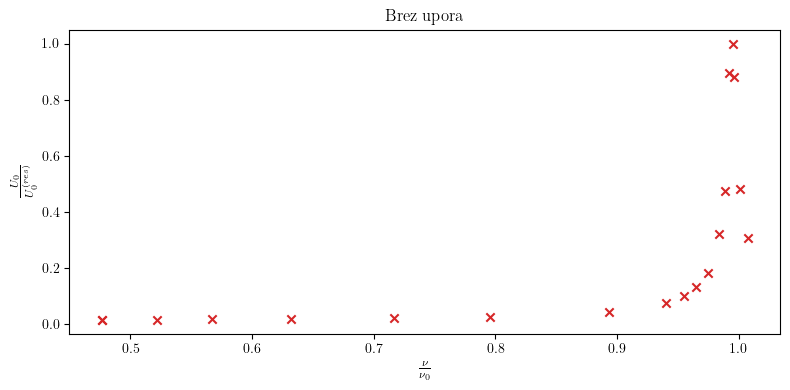

In [12]:
fig, ax = plt.subplots(1, 1, figsize=[8, 4])

ax.scatter(kurz_ν / kurz_ν_0, kurz_U_0 / kurz_U_0_res, label='meritve', color='tab:red', marker='x')

ax.set_title(r'Brez upora')
ax.set_xlabel(r'$\frac{\nu}{\nu_0}$')
ax.set_ylabel(r'$\frac{U_0}{U_0^{(res)}}$')
fig.tight_layout()

V točki $(1, 1)$ je vrh precej ostro špice pri lastni frekvenci, ki je enaka frekvenci vzbujanja. Tu je sistem v resonanci. Resonančni krivulju narišemo še za krog z uporom, prvo 5 Ω, nato 20 Ω.

In [13]:
R5Ω_i = np.argmax(R5Ω_U_0)
R5Ω_U_0_res = R5Ω_U_0[R5Ω_i]
R5Ω_C_res = R5Ω_C[R5Ω_i]
R5Ω_ν_res = R5Ω_ν[R5Ω_i]
R5Ω_ν_0 = 1 / (2*np.pi * np.sqrt(L * (R5Ω_C + C_o)))

R20Ω_i = np.argmax(R20Ω_U_0)
R20Ω_U_0_res = R20Ω_U_0[R20Ω_i]
R20Ω_C_res = R20Ω_C[R20Ω_i]
R20Ω_ν_res = R20Ω_ν[R20Ω_i]
R20Ω_ν_0 = 1 / (2*np.pi * np.sqrt(L * (R20Ω_C + C_o)))

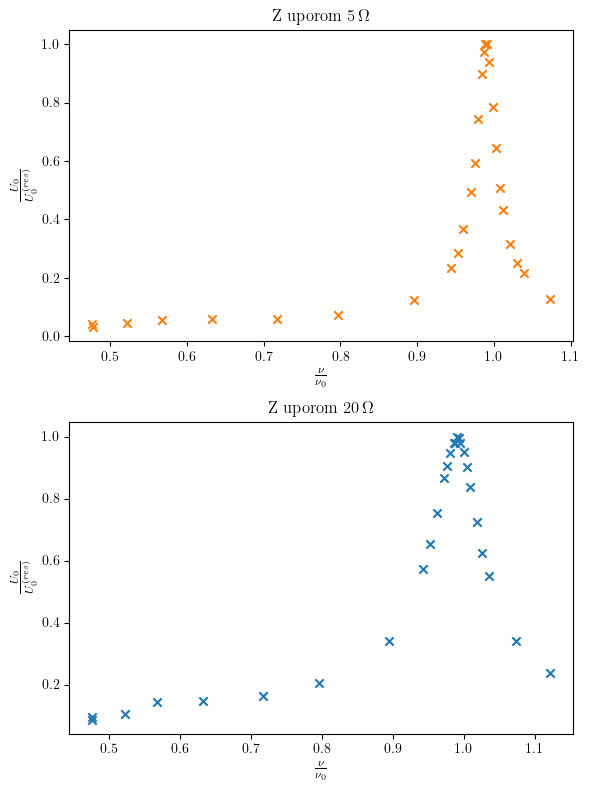

In [14]:
fig, axs = plt.subplots(2, 1, figsize=[6, 8])

axs[0].scatter(R5Ω_ν / R5Ω_ν_0, R5Ω_U_0 / R5Ω_U_0_res,
               label='meritve', color='tab:orange', marker='x')
axs[1].scatter(R20Ω_ν / R20Ω_ν_0, R20Ω_U_0 / R20Ω_U_0_res,
               label='meritve', color='tab:blue', marker='x')

axs[0].set_title(r'Z uporom $5\,\mathrm{\Omega}$')
axs[0].set_xlabel(r'$\frac{\nu}{\nu_0}$')
axs[0].set_ylabel(r'$\frac{U_0}{U_0^{(res)}}$')
axs[1].set_title(r'Z uporom $20\,\mathrm{\Omega}$')
axs[1].set_xlabel(r'$\frac{\nu}{\nu_0}$')
axs[1].set_ylabel(r'$\frac{U_0}{U_0^{(res)}}$')
fig.tight_layout()

Vidimo podobni, a bolj položni špici z vrhom v $(1, 1)$. Pri večjem uporu oz. dušenju je vrh bolj top, položen.

Zdaj si ogledamo še fazni zamik med vzbujevalnim in vzbujenim signalom. Prvo opazimo, da gredo slike iz padajoče daljice v elipso, krog, spet v elipso in nato v naraščajočo daljico. Če si narišemo skico, lahko vidimo, zakaj je na taki sliki $\sin \delta$ kar razmerje napetosti napetost $\frac{Y(X = 0)}{Y_{max}}$.

<img src="sketch.jpg" width=400>

Skice so sicer preveč grobe, da bi lahko fazni kot $\delta$ več kot ocenil. Vseeno je jasno, da je pri prvi sliki z maksimalnim dušenjem kot $\delta$ blizu $\pi$, torej sta napetosti izven faze. Pri zadnji sliki dušenja ni in kot pričakovano to pomeni, da sta napetosti v fazi, torej je $\delta$ zelo majhen. Pri pokončni elipsi, ki je pravzaprav krog, če bi le merilo bilo izbrano drugače, je kot $\frac{\pi}{2}$ – takrat je krog tudi v resonanci. Pri prvi poševni elipsi pa je kot $\sim \frac{3\pi}{4}$, pri drugi pa $\sim \frac{\pi}{4}$.